In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Process b3a_cov.dta

In [3]:
b3a_cov = pd.read_stata('adult_a/b3a_cov.dta')
b3a_cov

,hhid14_9,pid14,idivwr,resvis,rspndnt,panel,age,marstat,sex,dob_day,...,birth_cert_reas,hhid14,stemid,pid,pidlink,cp1,cp2,cp3,version,module
0,001060000,1.0,A35,1:Yes,1:Head of household,3:New,59.0,2:Married,1:Male,5.0,...,5:Didn't know it was required,0010600,00106,1.0,001060001,CF,2:Good,2:Good,1.3,B3A_COV
1,001060004,1.0,A34,1:Yes,2:Spouse of head,3:New,28.0,2:Married,3:Female,98:Don't Know,...,7:Cannot show if asked /misplaced birth certif...,0010651,00106,1.0,001060004,BD,3:Fair,3:Fair,1.3,B3A_COV
2,001060000,7.0,A33,1:Yes,2:Spouse of head,3:New,39.0,2:Married,3:Female,7.0,...,NaN,0010600,00106,7.0,001060007,BCD,1:Excellent,1:Excellent,1.3,B3A_COV
3,001060000,8.0,A33,1:Yes,3:Other HH member,3:New,16.0,1:Not yet married,3:Female,9.0,...,NaN,0010600,00106,8.0,001060008,EF,1:Excellent,1:Excellent,1.3,B3A_COV
4,001060004,2.0,A35,1:Yes,1:Head of household,3:New,30.0,2:Married,1:Male,4.0,...,5:Didn't know it was required,0010651,00106,2.0,001065102,BD,2:Good,2:Good,1.3,B3A_COV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36386,321291100,3.0,W33,1:Yes,3:Other HH member,3:New,20.0,1:Not yet married,3:Female,24.0,...,NaN,3212911,32129,3.0,321291103,CE,1:Excellent,1:Excellent,1.3,B3A_COV
36387,321291100,4.0,W33,1:Yes,3:Other HH member,3:New,19.0,1:Not yet married,1:Male,10.0,...,NaN,3212911,32129,4.0,321291104,E,1:Excellent,1:Excellent,1.3,B3A_COV
36388,321300000,1.0,W31,1:Yes,1:Head of household,1:Panel,48.0,2:Married,1:Male,5.0,...,NaN,3213000,32130,1.0,321300001,A,2:Good,2:Good,1.3,B3A_COV
36389,321300000,2.0,W32,1:Yes,2:Spouse of head,1:Panel,58.0,2:Married,3:Female,20.0,...,NaN,3213000,32130,2.0,321300002,F,2:Good,2:Good,1.3,B3A_COV


In [4]:
b3a_cov_clean = b3a_cov[['pidlink', 'marstat', 'age', 'sex']]
b3a_cov_clean

,pidlink,marstat,age,sex
0,001060001,2:Married,59.0,1:Male
1,001060004,2:Married,28.0,3:Female
2,001060007,2:Married,39.0,3:Female
3,001060008,1:Not yet married,16.0,3:Female
4,001065102,2:Married,30.0,1:Male
...,...,...,...,...
36386,321291103,1:Not yet married,20.0,3:Female
36387,321291104,1:Not yet married,19.0,1:Male
36388,321300001,2:Married,48.0,1:Male
36389,321300002,2:Married,58.0,3:Female


In [5]:
values_drop = ['1:Not yet married', '6:Cohabitate']
b3a_cov_clean = b3a_cov_clean[~b3a_cov_clean['marstat'].isin(values_drop)]
b3a_cov_clean

,pidlink,marstat,age,sex
0,001060001,2:Married,59.0,1:Male
1,001060004,2:Married,28.0,3:Female
2,001060007,2:Married,39.0,3:Female
4,001065102,2:Married,30.0,1:Male
5,001080003,2:Married,36.0,1:Male
...,...,...,...,...
36381,321290003,2:Married,44.0,3:Female
36382,321290004,2:Married,45.0,1:Male
36383,321290005,2:Married,39.0,1:Male
36388,321300001,2:Married,48.0,1:Male


In [8]:
b3a_cov_clean = b3a_cov_clean.dropna()
b3a_cov_clean

,pidlink,marstat,age,sex
0,001060001,2:Married,59.0,1:Male
1,001060004,2:Married,28.0,3:Female
2,001060007,2:Married,39.0,3:Female
4,001065102,2:Married,30.0,1:Male
5,001080003,2:Married,36.0,1:Male
...,...,...,...,...
36381,321290003,2:Married,44.0,3:Female
36382,321290004,2:Married,45.0,1:Male
36383,321290005,2:Married,39.0,1:Male
36388,321300001,2:Married,48.0,1:Male


In [12]:
b3a_cov_clean.to_csv('clean_data/b3a_cov_clean.csv', index=False)

In [45]:
b3a_cov_clean['sex'].value_counts()

sex
3:Female    15864
1:Male      13299
Name: count, dtype: int64

In [46]:
b3a_cov_clean['marstat'].value_counts()

marstat
2:Married            25800
5:Widowed             2366
4:Divorced             819
3:Separated            178
1:Not yet married        0
6:Cohabitate             0
Name: count, dtype: int64

In [2]:
b3a_cov_clean = pd.read_csv('clean_data/b3a_cov_clean.csv')
b3a_cov_clean

,pidlink,marstat,age,sex
0,1060001,2:Married,59.0,1:Male
1,1060004,2:Married,28.0,3:Female
2,1060007,2:Married,39.0,3:Female
3,1065102,2:Married,30.0,1:Male
4,1080003,2:Married,36.0,1:Male
...,...,...,...,...
29158,321290003,2:Married,44.0,3:Female
29159,321290004,2:Married,45.0,1:Male
29160,321290005,2:Married,39.0,1:Male
29161,321300001,2:Married,48.0,1:Male


In [7]:
pd.set_option('display.min_rows', None)

In [3]:
b3a_cov_clean['age'].value_counts()

32.0     1028
33.0      969
34.0      948
31.0      948
35.0      936
         ... 
99.0        1
110.0       1
14.0        1
107.0       1
109.0       1
Name: age, Length: 91, dtype: int64

In [6]:
b3a_cov_clean = b3a_cov_clean[b3a_cov_clean['age'] != "998:Don't Know"]
b3a_cov_clean

,pidlink,marstat,age,sex
0,1060001,2:Married,59.0,1:Male
1,1060004,2:Married,28.0,3:Female
2,1060007,2:Married,39.0,3:Female
3,1065102,2:Married,30.0,1:Male
4,1080003,2:Married,36.0,1:Male
...,...,...,...,...
29158,321290003,2:Married,44.0,3:Female
29159,321290004,2:Married,45.0,1:Male
29160,321290005,2:Married,39.0,1:Male
29161,321300001,2:Married,48.0,1:Male


In [8]:
b3a_cov_clean['age'] = b3a_cov_clean['age'].astype(int)
b3a_cov_clean

C:\Users\ideap\AppData\Local\Temp\ipykernel_22932\3731149357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b3a_cov_clean['age'] = b3a_cov_clean['age'].astype(int)


,pidlink,marstat,age,sex
0,1060001,2:Married,59,1:Male
1,1060004,2:Married,28,3:Female
2,1060007,2:Married,39,3:Female
3,1065102,2:Married,30,1:Male
4,1080003,2:Married,36,1:Male
...,...,...,...,...
29158,321290003,2:Married,44,3:Female
29159,321290004,2:Married,45,1:Male
29160,321290005,2:Married,39,1:Male
29161,321300001,2:Married,48,1:Male


In [10]:
b3a_cov_clean['age'].describe()

count    29159.000000
mean        42.456497
std         14.875299
min         14.000000
25%         31.000000
50%         39.000000
75%         52.000000
max        110.000000
Name: age, dtype: float64

In [11]:
b3a_cov_clean['sex'].value_counts()

3:Female    15862
1:Male      13297
Name: sex, dtype: int64

In [13]:
b3a_cov_clean['sex'].value_counts(normalize=True)

3:Female    0.543983
1:Male      0.456017
Name: sex, dtype: float64

### Process b3a_dl1.dta

In [42]:
b3a_dl1 = pd.read_stata('adult_a/b3a_dl1.dta')
b3a_dl1

,hhid14_9,pid14,dl01a,dl01f,dl01g,dl01h,dl01e,dl02,dl02a,dl03,...,dl16xd,dl30,dl40,dl41,dl42,dl43,hhid14,pidlink,version,module
0,001060000,1.000,N,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,...,NaN,NaN,,NaN,NaN,,0010600,001060001,1.300,B3A_DL1
1,001060004,1.000,N,M,M,M,96:None,1:Yes,1:Yes,1:Yes,...,2:New respondent,3:No,,NaN,NaN,,0010651,001060004,1.300,B3A_DL1
2,001060000,7.000,N,M,M,M,13:Nias,3:No,3:No,3:No,...,2:New respondent,3:No,,NaN,NaN,,0010600,001060007,1.300,B3A_DL1
3,001060000,8.000,WN,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,...,2:New respondent,1:Yes,A,3:No,3:No,,0010600,001060008,1.300,B3A_DL1
4,001060004,2.000,N,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,...,2:New respondent,3:No,,NaN,NaN,,0010651,001065102,1.300,B3A_DL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,321291100,3.000,WM,L,L,L,12:Makassar,1:Yes,3:No,1:Yes,...,2:New respondent,1:Yes,C,3:No,3:No,,3212911,321291103,1.300,B3A_DL1
34460,321291100,4.000,WM,L,L,L,12:Makassar,1:Yes,1:Yes,1:Yes,...,2:New respondent,1:Yes,A,1:Yes,3:No,,3212911,321291104,1.300,B3A_DL1
34461,321300000,1.000,WM,L,L,L,12:Makassar,1:Yes,3:No,1:Yes,...,3:Panel Respondent left school before June 2007,NaN,,NaN,NaN,,3213000,321300001,1.300,B3A_DL1
34462,321300000,2.000,WM,E,E,L,12:Makassar,1:Yes,1:Yes,1:Yes,...,NaN,NaN,,NaN,NaN,,3213000,321300002,1.300,B3A_DL1


In [43]:
b3a_dl1_clean = b3a_dl1[['pidlink', 'dl01f', 'dl06']]
b3a_dl1_clean

,pidlink,dl01f,dl06
0,001060001,M,2:Elementary school
1,001060004,M,2:Elementary school
2,001060007,M,2:Elementary school
3,001060008,M,3:Junior high general
4,001065102,M,3:Junior high general
...,...,...,...
34459,321291103,L,"60:College (D1,D2,D3)"
34460,321291104,L,61:University S1
34461,321300001,L,6:Senior high vocational
34462,321300002,E,5:Senior high general


In [44]:
b3a_dl1_clean = b3a_dl1_clean.dropna()
b3a_dl1_clean

,pidlink,dl01f,dl06
0,001060001,M,2:Elementary school
1,001060004,M,2:Elementary school
2,001060007,M,2:Elementary school
3,001060008,M,3:Junior high general
4,001065102,M,3:Junior high general
...,...,...,...
34459,321291103,L,"60:College (D1,D2,D3)"
34460,321291104,L,61:University S1
34461,321300001,L,6:Senior high vocational
34462,321300002,E,5:Senior high general


In [13]:
b3a_dl1_clean.to_csv('clean_data/b3a_dl1_clean.csv', index=False)

In [23]:
b3a_dl1_clean = pd.read_csv('clean_data/b3a_dl1_clean.csv')
b3a_dl1_clean

,pidlink,dl06
0,1060001,2:Elementary school
1,1060004,2:Elementary school
2,1060007,2:Elementary school
3,1060008,3:Junior high general
4,1065102,3:Junior high general
...,...,...
32672,321291103,"60:College (D1,D2,D3)"
32673,321291104,61:University S1
32674,321300001,6:Senior high vocational
32675,321300002,5:Senior high general


In [47]:
b3a_dl1_clean['dl01f'].value_counts()

A       13226
B        3836
         2236
I        1677
D        1351
        ...  
J Q         1
B E1        1
B I         1
N Q         1
B L         1
Name: dl01f, Length: 85, dtype: int64

In [45]:
b3a_dl1_clean['dl06'].value_counts()

2:Elementary school                                    9896
5:Senior high general                                  5341
3:Junior high general                                  5124
6:Senior high vocational                               4546
61:University S1                                       3192
60:College (D1,D2,D3)                                  1226
73:Islamic Junior/High School (Madrasah Tsanawiyah)    1100
74:Islamic Senior/High School (Madrasah Tsanawiyah)     909
72:Islamic Elementary School (Madrasah Ibtidaiyah)      403
15:Adult education C                                    240
4:Junior high vocational                                206
62:University S2                                        202
12:Adult education B                                    108
14:Islamic School (pesantren)                            78
13:Open university                                       28
11:Adult education A                                     22
95:Other                                

In [46]:
education_mapping = {
    '2:Elementary school': 6,
    '5:Senior high general': 12, # 6 (SD) + 3 (SMP) + 3 (SMA)
    '3:Junior high general': 9,  # 6 (SD) + 3 (SMP)
    '6:Senior high vocational': 13,
    '61:University S1': 16, # 12 (SMA) + 4 (S1)
    '60:College (D1,D2,D3)': 15, # 12 (SMA) + 2 (D2, example)
    '73:Islamic Junior/High School (Madrasah Tsanawiyah)': 9,
    '74:Islamic Senior/High School (Madrasah Tsanawiyah)': 12,
    '72:Islamic Elementary School (Madrasah Ibtidaiyah)': 6,
    '15:Adult education C': 9,
    '4:Junior high vocational': 9,
    '62:University S2': 18,
    '12:Adult education B': 6,
    '14:Islamic School (pesantren)': np.nan, # Varies, or can be mapped to others
    '13:Open university': 16,
    '11:Adult education A': 3,
    '95:Other': np.nan,
    '17:School for Disabled': np.nan,
    '63:University S3': 22,
    '98:Don\'t Know': np.nan,
    '99:MISSING': np.nan,
    '90:Kindergarten': 0
}

In [26]:
b3a_dl1_clean['dl06'] = b3a_dl1_clean['dl06'].map(education_mapping)
b3a_dl1_clean

,pidlink,dl06
0,1060001,6.0
1,1060004,6.0
2,1060007,6.0
3,1060008,9.0
4,1065102,9.0
...,...,...
32672,321291103,15.0
32673,321291104,16.0
32674,321300001,13.0
32675,321300002,12.0


In [27]:
b3a_dl1_clean = b3a_dl1_clean.dropna(subset=['dl06'])
b3a_dl1_clean

,pidlink,dl06
0,1060001,6.0
1,1060004,6.0
2,1060007,6.0
3,1060008,9.0
4,1065102,9.0
...,...,...
32672,321291103,15.0
32673,321291104,16.0
32674,321300001,13.0
32675,321300002,12.0


In [28]:
b3a_dl1_clean['dl06'].describe()

count    32557.000000
mean        10.150444
std          3.509186
min          0.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         22.000000
Name: dl06, dtype: float64

In [30]:
b3a_dl1_clean.to_csv('clean_data/b3a_dl1_clean.csv', index=False)

### Process b3a_tk2.dta

In [14]:
b3a_tk2 = pd.read_stata('adult_a/b3a_tk2.dta')
b3a_tk2

,hhid14_9,pid14,tkp18ax,tk18abx,tkp19ax,tkp19aa,tkp20ax,tk20aax,tk20aa,tk20ab,...,tk25b1,tk25b2,tk25b2b,tk23bx,tk23b2mx,tk23b2yx,version,module,tk26b1,tk26b3
0,001060004,1.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
1,001060000,7.0,NaN,W,NaN,NaN,NaN,1:Given,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
2,001060000,8.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
3,001060004,2.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
4,001080003,1.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24484,321290000,3.0,NaN,W,NaN,NaN,NaN,1:Given,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
24485,321291100,1.0,NaN,B,NaN,NaN,NaN,1:Given,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
24486,321290000,5.0,NaN,B,NaN,NaN,NaN,1:Given,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.3,B3A_TK2,2800000.0,16800000.0
24487,321290000,7.0,NaN,Y,NaN,NaN,NaN,1:Given,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN


In [19]:
b3a_tk2_clean = b3a_tk2[['pidlink', 'tk25a1', 'tk25a2']]
b3a_tk2_clean

,pidlink,tk25a1,tk25a2
0,001060004,NaN,NaN
1,001060007,NaN,NaN
2,001060008,NaN,NaN
3,001065102,NaN,NaN
4,001080003,NaN,NaN
...,...,...,...
24484,321290003,NaN,NaN
24485,321290004,NaN,NaN
24486,321290005,NaN,NaN
24487,321290007,NaN,NaN


In [20]:
b3a_tk2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24489 entries, 0 to 24488
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pidlink  24489 non-null  object 
 1   tk25a1   12519 non-null  float64
 2   tk25a2   12425 non-null  float64
dtypes: float64(2), object(1)
memory usage: 574.1+ KB


In [21]:
b3a_tk2_clean = b3a_tk2_clean.dropna()
b3a_tk2_clean

,pidlink,tk25a1,tk25a2
8,001220003,0.0,3500000.0
9,001220006,2000000.0,8000000.0
10,001220008,700000.0,2050000.0
15,001240007,200000.0,3600000.0
19,001240016,240000.0,240000.0
...,...,...,...
24479,321280005,2000000.0,26000000.0
24480,321280008,30000000.0,33000000.0
24481,321280009,5000000.0,62500000.0
24482,321280012,400000.0,4800000.0


In [22]:
b3a_tk2_clean.to_csv('clean_data/b3a_tk2_clean.csv', index=False)

In [31]:
b3a_tk2_clean = pd.read_csv('clean_data/b3a_tk2_clean.csv')
b3a_tk2_clean

,pidlink,tk25a1,tk25a2
0,1220003,0.0,3500000.0
1,1220006,2000000.0,8000000.0
2,1220008,700000.0,2050000.0
3,1240007,200000.0,3600000.0
4,1240016,240000.0,240000.0
...,...,...,...
12393,321280005,2000000.0,26000000.0
12394,321280008,30000000.0,33000000.0
12395,321280009,5000000.0,62500000.0
12396,321280012,400000.0,4800000.0


In [34]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
b3a_tk2_clean[['tk25a1','tk25a2']].describe()

,tk25a1,tk25a2
count,12398.000,12398.000
mean,1931010.727,20692403.430
std,12903603.042,32885408.705
min,0.000,0.000
25%,550000.000,4000000.000
50%,1250000.000,12000000.000
75%,2400000.000,27000000.000
max,999999997.000,999999997.000


In [36]:
bins = [
    0,         # < 500,000
    500000,    # 500,000 - 1,000,000
    1000000,   # 1,000,000 - 2,000,000
    2000000,   # 2,000,000 - 4,000,000
    4000000,
    10000000,
    20000000,
    np.inf     # > 4,000,000
]

labels = [
    '< 500,000',
    '500,000 - 1,000,000',
    '1,000,000 - 2,000,000',
    '2,000,000 - 4,000,000',
    '4,000,000 - 10,000,000',
    '10,000,000 - 20,000,000',
    '> 20,000,000'
]

df_income = pd.cut(b3a_tk2_clean['tk25a1'], bins=bins, labels=labels, right=False)

In [39]:
income_counts = df_income.value_counts().sort_index()
income_counts

< 500,000                  2572
500,000 - 1,000,000        2132
1,000,000 - 2,000,000      3485
2,000,000 - 4,000,000      3116
4,000,000 - 10,000,000      977
10,000,000 - 20,000,000      84
> 20,000,000                 32
Name: tk25a1, dtype: int64

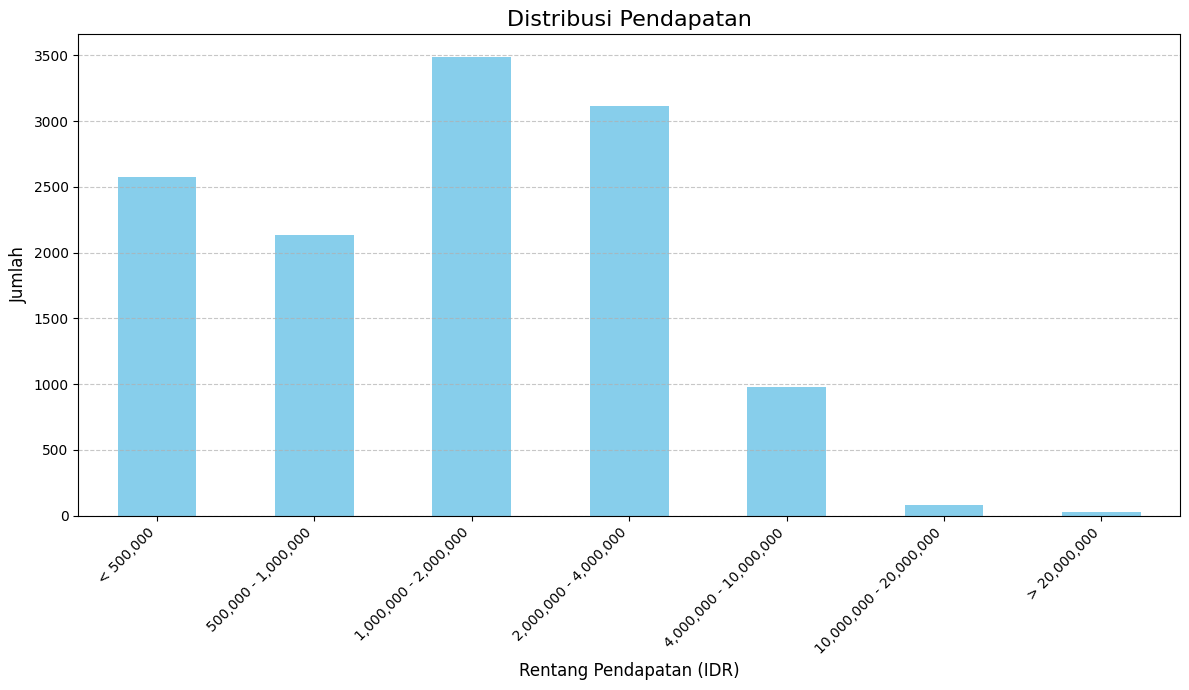

In [41]:
# Create a bar chart
plt.figure(figsize=(12, 7))
income_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribusi Pendapatan', fontsize=16)
plt.xlabel('Rentang Pendapatan (IDR)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make sure labels are not cut off
plt.tight_layout()

# Save the plot
plt.savefig('income_distribution_bar_chart.png')

### Process

In [25]:
b3a_kw1 = pd.read_stata('adult_a/b3a_kw1.dta')
b3a_kw1

,hhid14_9,pid14,kw300a,kw00ba,kw00bc,kw00c,kw00d,kw01a,kw301,kw02a1,...,kw27a,kw27b,hhid14,pidlink,kw02m,kw12b,kw13b,kw14,version,module
0,001060000,1.0,3:No,NaN,NaN,NaN,NaN,5:Married formal according to adat law,3:No,1:Yes,...,NaN,NaN,0010600,001060001,NaN,NaN,2000000.0,200000.0,1.3,B3A_KW1
1,001060004,1.0,3:No,NaN,NaN,NaN,NaN,5:Married formal according to adat law,1:Yes,NaN,...,NaN,NaN,0010651,001060004,NaN,NaN,NaN,NaN,1.3,B3A_KW1
2,001060000,7.0,3:No,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),1:Yes,NaN,...,NaN,NaN,0010600,001060007,NaN,NaN,NaN,NaN,1.3,B3A_KW1
3,001060000,8.0,3:No,NaN,NaN,NaN,NaN,1:Never married,NaN,NaN,...,NaN,NaN,0010600,001060008,NaN,NaN,NaN,NaN,1.3,B3A_KW1
4,001060004,2.0,3:No,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),3:No,1:Yes,...,NaN,NaN,0010651,001065102,NaN,NaN,NaN,NaN,1.3,B3A_KW1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,321291100,3.0,3:No,NaN,NaN,NaN,NaN,1:Never married,NaN,NaN,...,NaN,NaN,3212911,321291103,NaN,NaN,NaN,NaN,1.3,B3A_KW1
34460,321291100,4.0,3:No,NaN,NaN,NaN,NaN,1:Never married,NaN,NaN,...,NaN,NaN,3212911,321291104,NaN,NaN,NaN,NaN,1.3,B3A_KW1
34461,321300000,1.0,1:Yes,3.0,2.0,1:Yes,3:No,NaN,NaN,1:Yes,...,NaN,NaN,3213000,321300001,NaN,NaN,NaN,NaN,1.3,B3A_KW1
34462,321300000,2.0,1:Yes,3.0,1.0,1:Yes,3:No,NaN,NaN,1:Yes,...,NaN,NaN,3213000,321300002,NaN,NaN,NaN,NaN,1.3,B3A_KW1


In [29]:
b3a_kw1['kw04'].value_counts()

kw04
3:Self                               4130
1:Parents                             203
4:Other family member from parent      61
5:Others                               35
9:MISSING                               2
Name: count, dtype: int64

In [30]:
b3a_kw1_clean = b3a_kw1[['pidlink', 'kw04']]
b3a_kw1_clean

,pidlink,kw04
0,001060001,3:Self
1,001060004,NaN
2,001060007,NaN
3,001060008,NaN
4,001065102,1:Parents
...,...,...
34459,321291103,NaN
34460,321291104,NaN
34461,321300001,NaN
34462,321300002,NaN


In [31]:
b3a_kw1_clean = b3a_kw1_clean.dropna()
b3a_kw1_clean

,pidlink,kw04
0,001060001,3:Self
4,001065102,1:Parents
5,001080003,3:Self
16,001240002,1:Parents
17,001240003,1:Parents
...,...,...
34439,321270004,3:Self
34441,321270006,3:Self
34447,321280005,3:Self
34448,321280008,3:Self


In [32]:
b3a_kw1_clean.to_csv('clean_data/b3a_kw1_clean.csv', index=False)

In [44]:
bk_sc1 = pd.read_stata('control_book/bk_sc1.dta')
bk_sc1

,hhid14_9,sc05,sc10,sc12,sc13,sc14,sc15,sc21x,sc21,hhid14,sc01_14_14,sc02_14_14,sc03_14_14,version,module
0,001060000,2:Rural,A01,A02,A21,A35,A33,"13:Move out of the village, same province",NaN,0010600,12.0,1.0,62.0,1.3,BK_SC1
1,001060004,2:Rural,A01,A11,B21,A35,A34,"14:Move out of the village, different province",NaN,0010651,12.0,1.0,62.0,1.3,BK_SC1
2,001080000,2:Rural,A01,A11,A21,A31,A35,"13:Move out of the village, same province",NaN,0010800,12.0,1.0,62.0,1.3,BK_SC1
3,001080003,2:Rural,A01,A02,A21,A35,A33,"14:Move out of the village, different province",NaN,0010851,12.0,1.0,62.0,1.3,BK_SC1
4,001220000,2:Rural,A01,A11,A21,A33,A34,96:SAME LOCATION,NaN,0012200,12.0,1.0,62.0,1.3,BK_SC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15916,321280006,1:Urban,U01,U11,U21,U35,U31,"14:Move out of the village, different province",NaN,3212852,52.0,1.0,30.0,1.3,BK_SC1
15917,321280009,1:Urban,K01,N11,N21,N32,N33,"12:Move out of the village, same district",NaN,3212853,73.0,71.0,30.0,1.3,BK_SC1
15918,321290000,1:Urban,U01,W11,W21,W34,W33,96:SAME LOCATION,NaN,3212900,73.0,71.0,110.0,1.3,BK_SC1
15919,321291100,1:Urban,U01,W11,W21,W34,W33,96:SAME LOCATION,NaN,3212911,73.0,71.0,110.0,1.3,BK_SC1


In [43]:
bk_sc1['ar18i'].value_counts()

ar18i
1:In the same village        7540
4:In the same province       4605
3:In the same district       3230
2:In the same subdistrict    2028
31:Jakarta                   1178
                             ... 
151:Holland                     3
121:Yemen                       2
152:UK                          2
75:Gorontalo                    2
123:Kuwait                      1
Name: count, Length: 62, dtype: int64